In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Dataset/training_data.csv')
print(len(df), 'rows')
df

3232 rows


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


# VISUALIZAÇÃO DOS DADOS

In [5]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


### VALORES ÚNICOS

In [6]:
def showUnique(df):
    w = max(len(c) for c in df.columns)  # largura do maior nome de coluna

    for col in df.columns:
        try:
            unique = df[col].unique().tolist()
            N      = len(unique)
            exemplo = ', '.join(map(str, unique[:10]))
            print(f'{col:<{w}}  [{exemplo}{f" ... +{len(unique)}" if N > 10 else ""}]')
        except Exception as error:
            print(error)    

showUnique(df)

Facies     [3, 2, 8, 6, 7, 4, 5, 9, 1]
Formation  [A1 SH, A1 LM, B1 SH, B1 LM, B2 SH, B2 LM, B3 SH, B3 LM, B4 SH, B4 LM ... +14]
Well Name  [SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]
Depth      [2793.0, 2793.5, 2794.0, 2794.5, 2795.0, 2795.5, 2796.0, 2796.5, 2797.0, 2797.5 ... +1099]
GR         [77.45, 78.26, 79.05, 86.1, 74.58, 73.97, 73.72, 75.65, 73.79, 76.89 ... +2776]
ILD_log10  [0.664, 0.661, 0.658, 0.655, 0.647, 0.636, 0.63, 0.625, 0.624, 0.615 ... +1276]
DeltaPHI   [9.9, 14.2, 14.8, 13.9, 13.5, 14.0, 15.6, 16.5, 16.2, 16.9 ... +1055]
PHIND      [11.915, 12.565, 13.05, 13.115, 13.3, 13.385, 13.93, 13.92, 13.98, 14.22 ... +1949]
PE         [4.6, 4.1, 3.6, 3.5, 3.4, 3.7, 3.2, 3.1, 3.0, 2.9 ... +995]
NM_M       [1, 2]
RELPOS     [1.0, 0.979, 0.957, 0.936, 0.915, 0.894, 0.872, 0.83, 0.809, 0.787 ... +825]


- Variável Alvo, verificação de desbalanceamento

In [7]:
TARGET = 'Facies'

for label in df[TARGET].unique():
    total = (df[TARGET] == label).sum()
    print(f'classe {label}: {(total)} ({total/len(df)*100:.2f}%)')

classe 3: 615 (19.03%)
classe 2: 738 (22.83%)
classe 8: 498 (15.41%)
classe 6: 462 (14.29%)
classe 7: 98 (3.03%)
classe 4: 184 (5.69%)
classe 5: 217 (6.71%)
classe 9: 161 (4.98%)
classe 1: 259 (8.01%)


### COLUNAS INVÁLIDAS

In [8]:
nan_rows = df[df.isna().any(axis=1)]
print(len(nan_rows), 'colunas NaN')
nan_rows

0 colunas NaN


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS


### LINHAS INVÁLIDAS

In [9]:
nan_columns = df.columns[df.isna().any()].tolist()

for column in nan_columns:
    N = df[column].isna().sum()
    print(f'"{column}": {N} NaN rows ({N/len(df)*100:.2f}%)')

# ANÁLISE DOS DADOS

### COMPARAÇÃO - CATEGÓRICOS

In [10]:
CATEG_LIMIT = 10
df_categ    = df.loc[:, df.nunique() <= CATEG_LIMIT]
df_categ.head()

,Facies,Well Name,NM_M
0,3,SHRIMPLIN,1
1,3,SHRIMPLIN,1
2,3,SHRIMPLIN,1
3,3,SHRIMPLIN,1
4,3,SHRIMPLIN,1


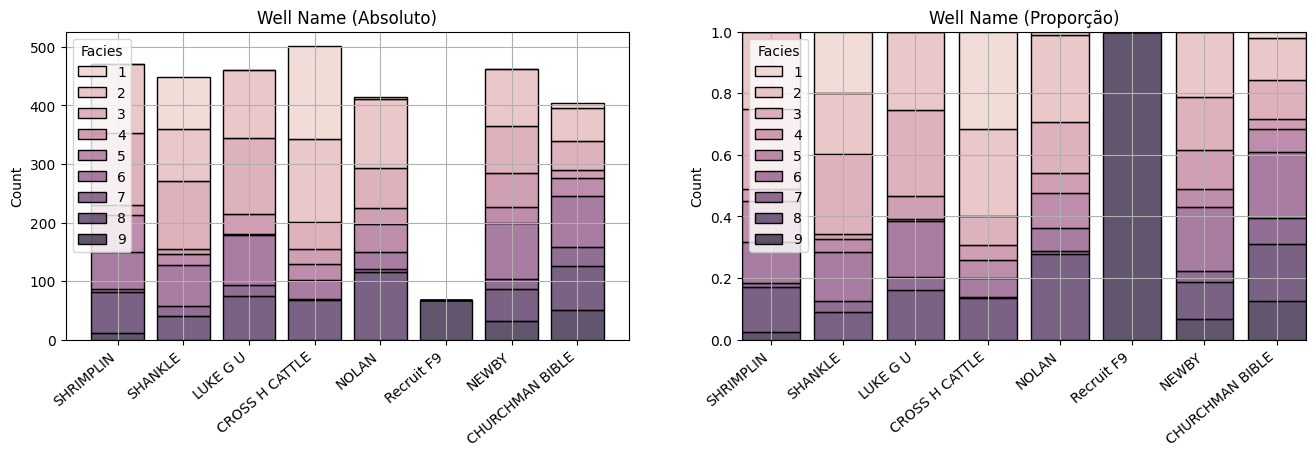

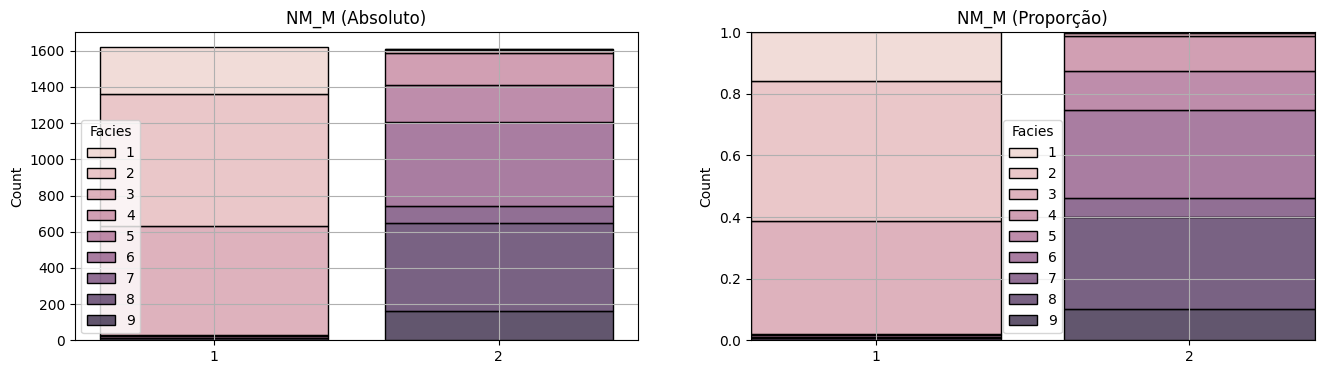

In [11]:
for col in df_categ.columns:
    if col == TARGET:
        continue
        
    target = df[col].astype(str)
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=target, hue=TARGET, multiple='stack', discrete=True, shrink=0.8)
    plt.title(f'{col} (Absoluto)'); plt.grid(); plt.xlabel('')
    if df[col].unique().__len__() > 3: plt.xticks(rotation=40, ha='right')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=target, hue=TARGET, multiple='fill', discrete=True, shrink=0.8)
    plt.title(f'{col} (Proporção)'); plt.grid(); plt.xlabel('')
    if df[col].unique().__len__() > 3: plt.xticks(rotation=40, ha='right')

### COMPARAÇÃO - NUMÉRICOS

In [12]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...
3227,5,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


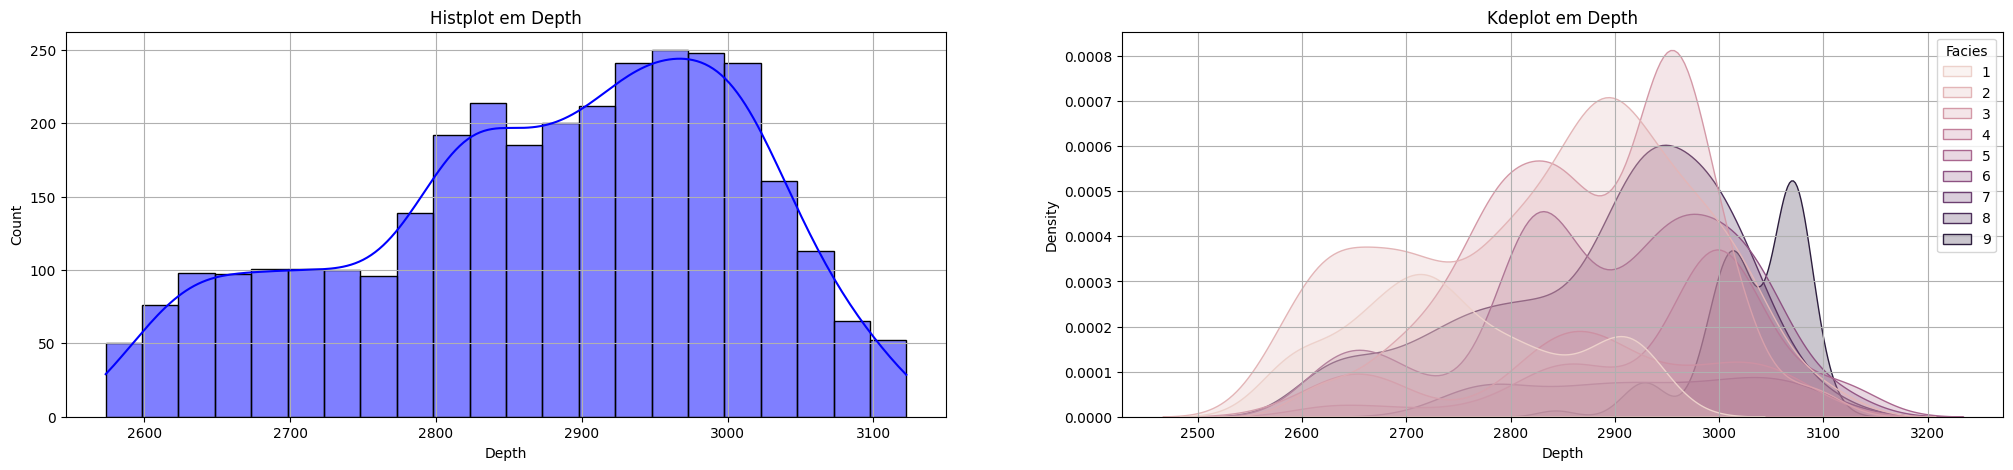

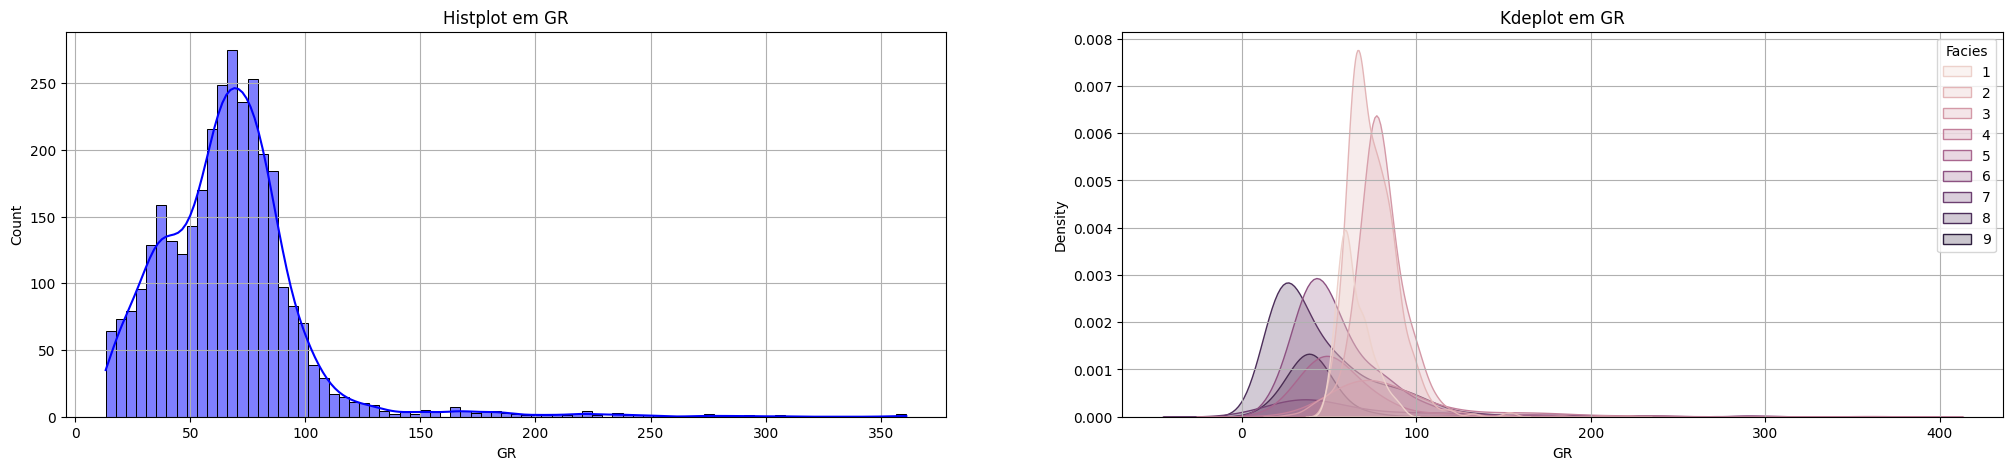

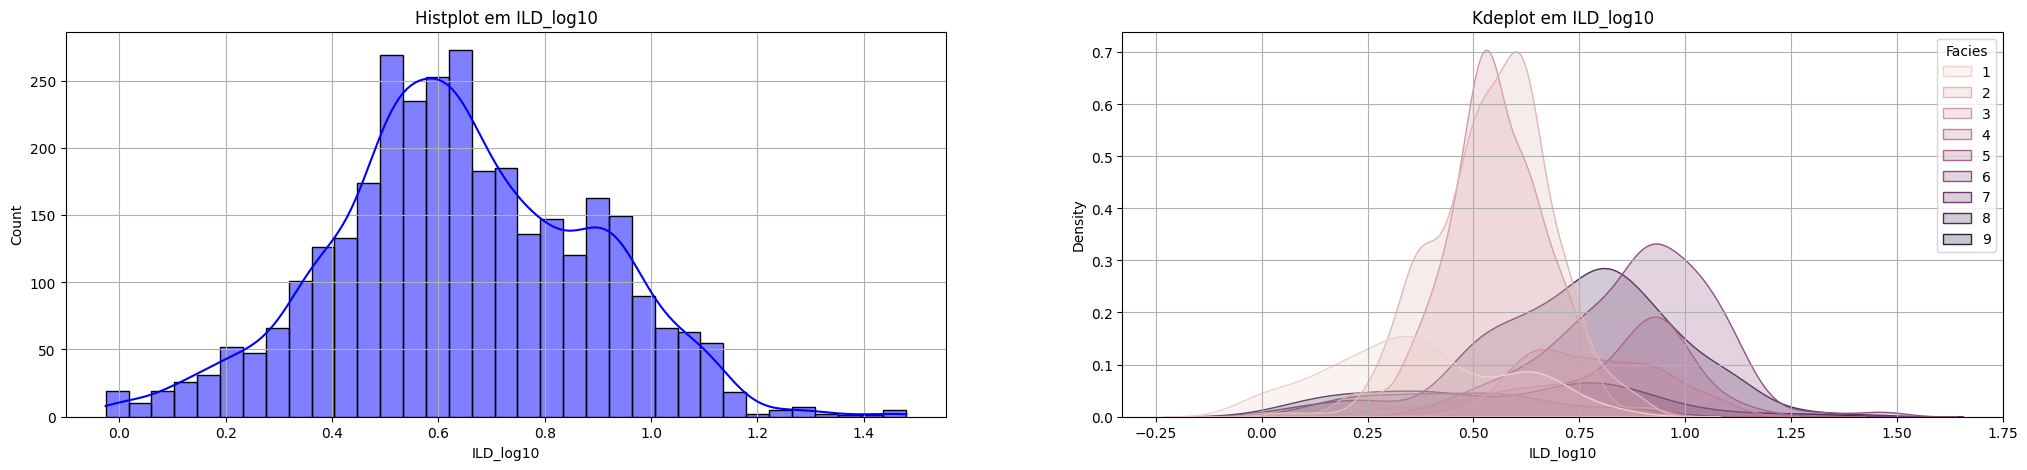

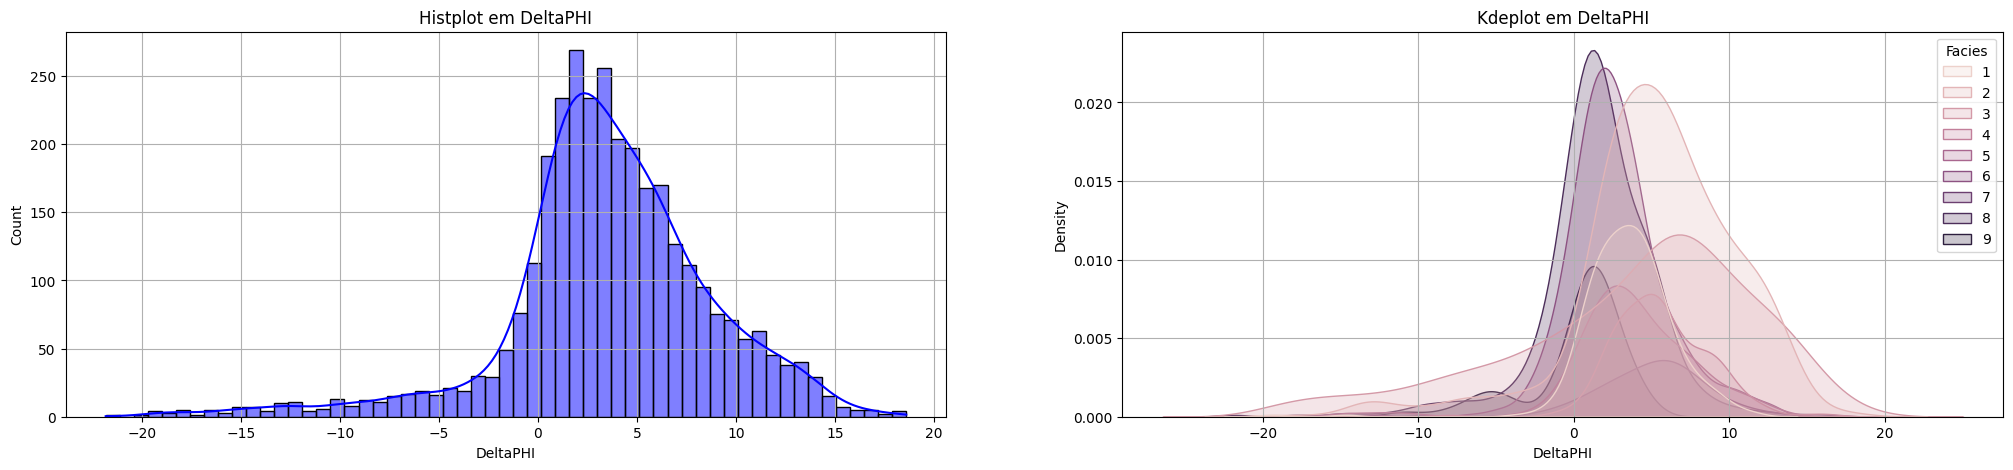

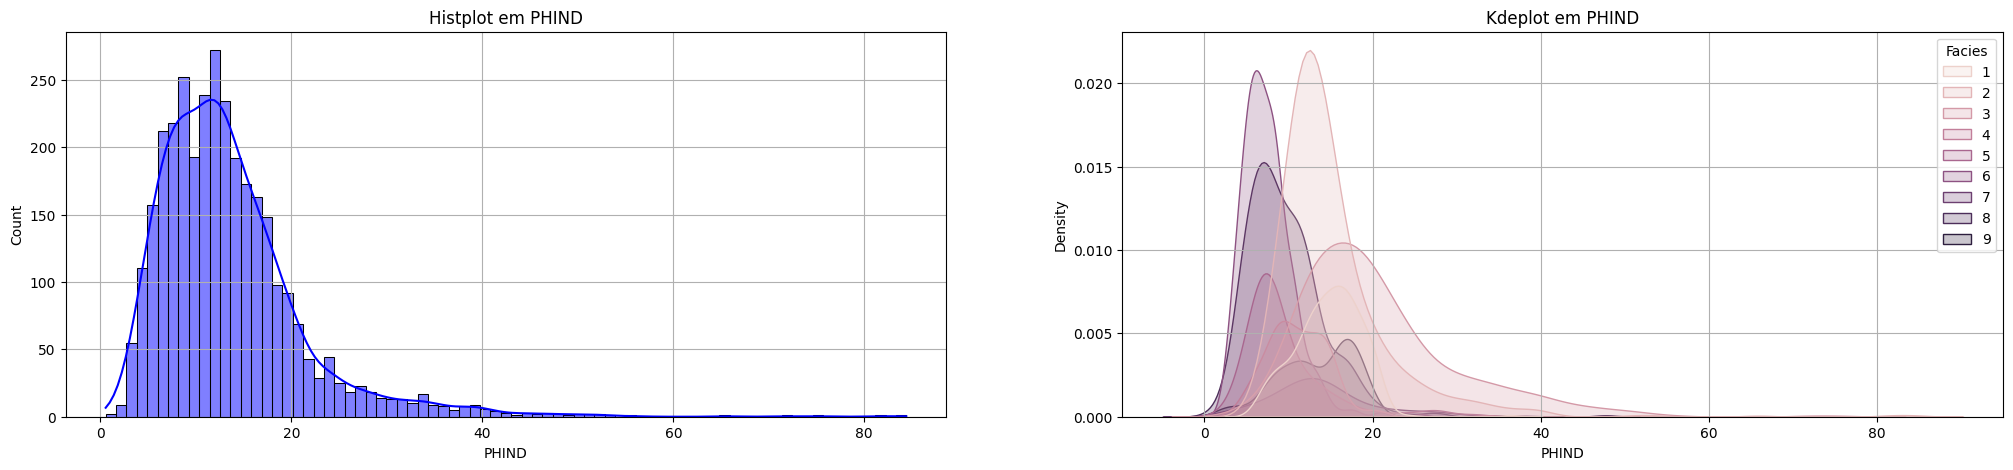

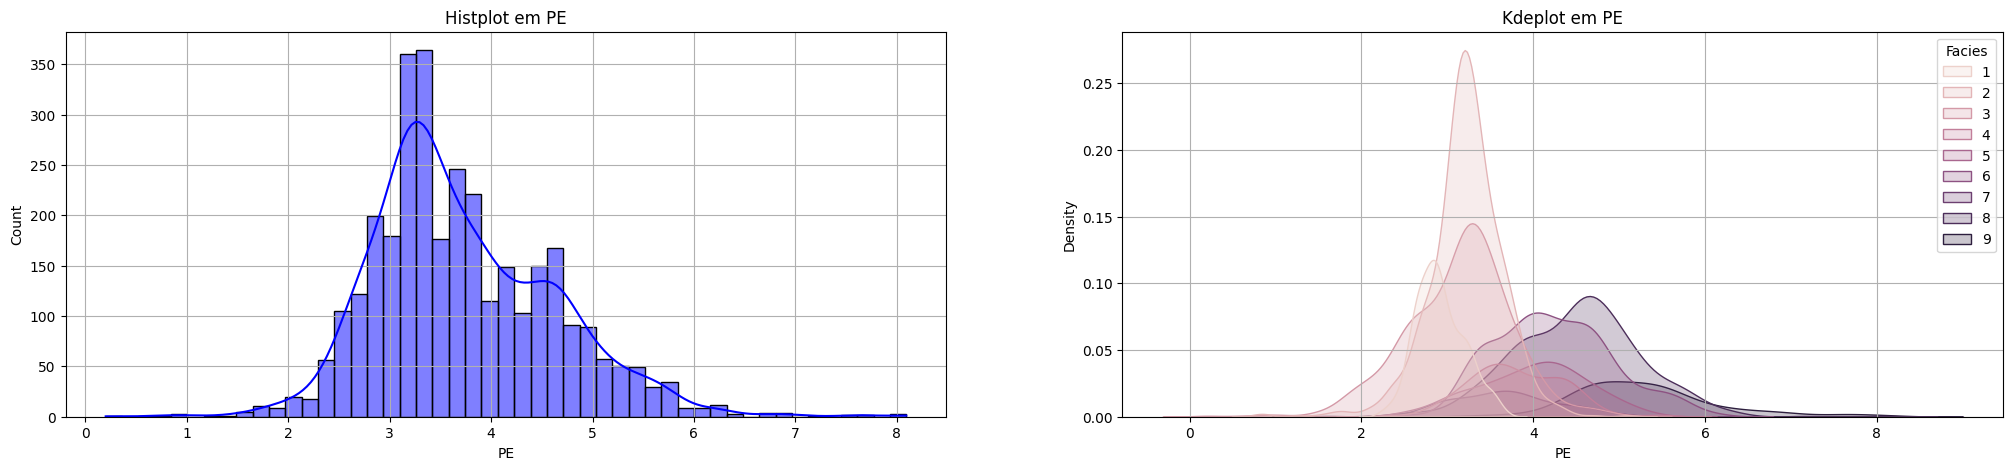

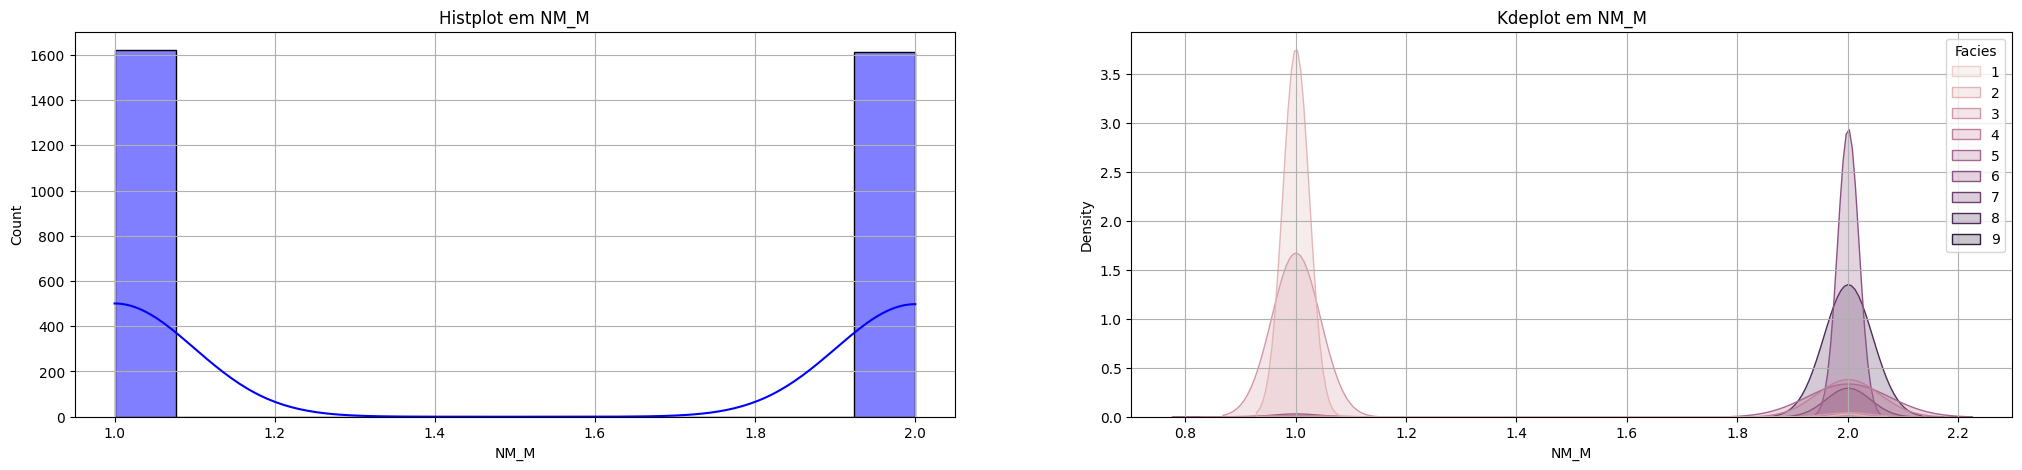

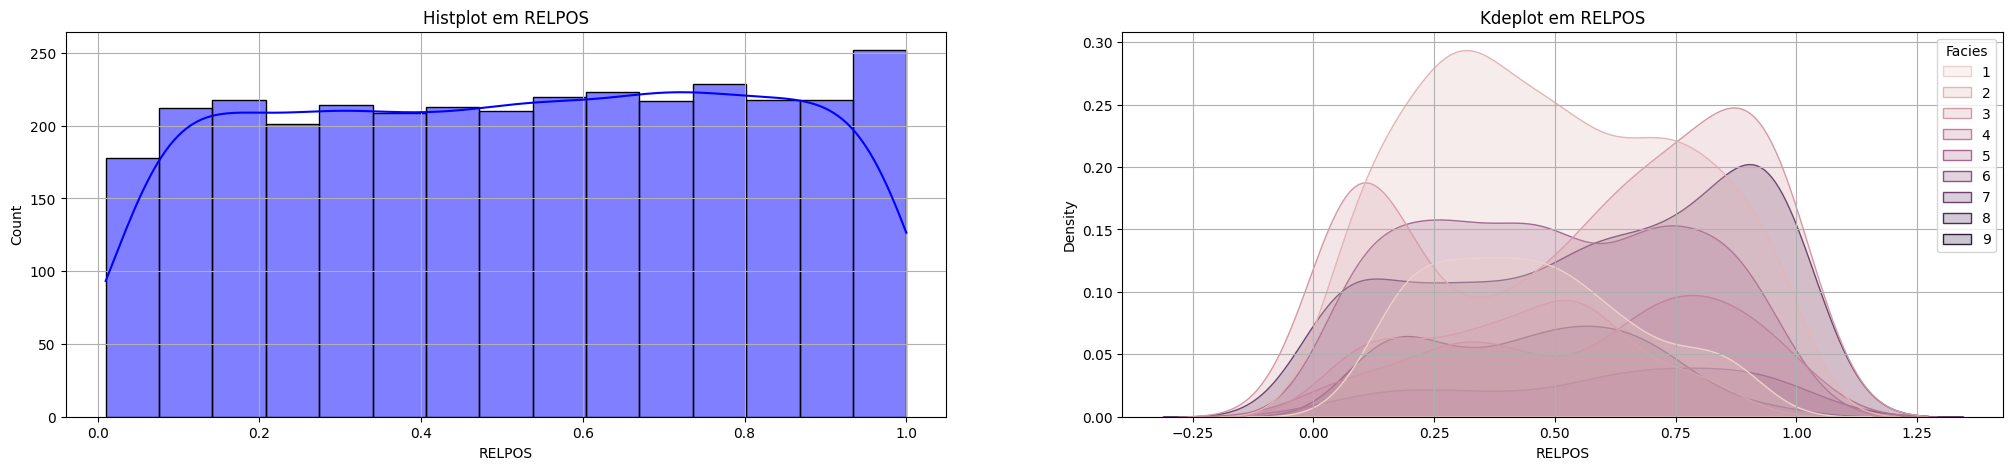

In [13]:
for col in df_numeric:
    if col == TARGET:
        continue
    
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], color='blue', kde=True); plt.grid()
    plt.title(f'Histplot em {col}')

    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=col, hue=TARGET, fill=True, warn_singular=False); plt.grid()
    plt.title(f'Kdeplot em {col}')

# CONVERSÃO DE TIPOS

In [14]:
showUnique(df)

Facies     [3, 2, 8, 6, 7, 4, 5, 9, 1]
Formation  [A1 SH, A1 LM, B1 SH, B1 LM, B2 SH, B2 LM, B3 SH, B3 LM, B4 SH, B4 LM ... +14]
Well Name  [SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]
Depth      [2793.0, 2793.5, 2794.0, 2794.5, 2795.0, 2795.5, 2796.0, 2796.5, 2797.0, 2797.5 ... +1099]
GR         [77.45, 78.26, 79.05, 86.1, 74.58, 73.97, 73.72, 75.65, 73.79, 76.89 ... +2776]
ILD_log10  [0.664, 0.661, 0.658, 0.655, 0.647, 0.636, 0.63, 0.625, 0.624, 0.615 ... +1276]
DeltaPHI   [9.9, 14.2, 14.8, 13.9, 13.5, 14.0, 15.6, 16.5, 16.2, 16.9 ... +1055]
PHIND      [11.915, 12.565, 13.05, 13.115, 13.3, 13.385, 13.93, 13.92, 13.98, 14.22 ... +1949]
PE         [4.6, 4.1, 3.6, 3.5, 3.4, 3.7, 3.2, 3.1, 3.0, 2.9 ... +995]
NM_M       [1, 2]
RELPOS     [1.0, 0.979, 0.957, 0.936, 0.915, 0.894, 0.872, 0.83, 0.809, 0.787 ... +825]


In [15]:
df = df.map(lambda val: 'No' if val == 'No internet service' else val)
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [16]:
def parseNumeric(df):
    objects = df.select_dtypes(include="object").columns
    numeric = [c for c in objects if df[c].nunique() > len(df)*0.35]
    boolean = [c for c in objects if df[c].nunique() <= 2]

    for column in numeric:
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

    for column in boolean:
        vals = sorted(df[column].dropna().unique())
        df[column] = False if len(vals) == 1 else df[column].map({vals[0]: False, vals[1]: True}).astype("boolean")

    # convertendo dummies (one hot encoding)
    categoric = [c for c in df.columns if df[c].dtype == "object" and df[c].nunique() > 2]
    return pd.get_dummies(df, columns=categoric, drop_first=True)


df = parseNumeric(df)
df

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Formation_A1 SH,Formation_B1 LM,Formation_B1 SH,Formation_B2 LM,Formation_B2 SH,Formation_B3 LM,Formation_B3 SH,Formation_B4 LM,Formation_B4 SH,Formation_B5 LM,Formation_B5 SH,Formation_C LM,Formation_C SH,Well Name_CROSS H CATTLE,Well Name_LUKE G U,Well Name_NEWBY,Well Name_NOLAN,Well Name_Recruit F9,Well Name_SHANKLE,Well Name_SHRIMPLIN
0,3,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,3,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,3,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,3,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,3,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,5,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3228,5,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3229,5,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3230,5,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [17]:
showUnique(df)

Facies                    [3, 2, 8, 6, 7, 4, 5, 9, 1]
Depth                     [2793.0, 2793.5, 2794.0, 2794.5, 2795.0, 2795.5, 2796.0, 2796.5, 2797.0, 2797.5 ... +1099]
GR                        [77.45, 78.26, 79.05, 86.1, 74.58, 73.97, 73.72, 75.65, 73.79, 76.89 ... +2776]
ILD_log10                 [0.664, 0.661, 0.658, 0.655, 0.647, 0.636, 0.63, 0.625, 0.624, 0.615 ... +1276]
DeltaPHI                  [9.9, 14.2, 14.8, 13.9, 13.5, 14.0, 15.6, 16.5, 16.2, 16.9 ... +1055]
PHIND                     [11.915, 12.565, 13.05, 13.115, 13.3, 13.385, 13.93, 13.92, 13.98, 14.22 ... +1949]
PE                        [4.6, 4.1, 3.6, 3.5, 3.4, 3.7, 3.2, 3.1, 3.0, 2.9 ... +995]
NM_M                      [1, 2]
RELPOS                    [1.0, 0.979, 0.957, 0.936, 0.915, 0.894, 0.872, 0.83, 0.809, 0.787 ... +825]
Formation_A1 SH           [True, False]
Formation_B1 LM           [False, True]
Formation_B1 SH           [False, True]
Formation_B2 LM           [False, True]
Formation_B2 SH           [Fa

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Facies                    3232 non-null   int64  
 1   Depth                     3232 non-null   float64
 2   GR                        3232 non-null   float64
 3   ILD_log10                 3232 non-null   float64
 4   DeltaPHI                  3232 non-null   float64
 5   PHIND                     3232 non-null   float64
 6   PE                        3232 non-null   float64
 7   NM_M                      3232 non-null   int64  
 8   RELPOS                    3232 non-null   float64
 9   Formation_A1 SH           3232 non-null   bool   
 10  Formation_B1 LM           3232 non-null   bool   
 11  Formation_B1 SH           3232 non-null   bool   
 12  Formation_B2 LM           3232 non-null   bool   
 13  Formation_B2 SH           3232 non-null   bool   
 14  Formatio

# CORRELAÇÕES

- **Pearson:** $\Rightarrow$ Melhor quando a relação é linear e as variáveis são numéricas contínuas com distribuição razoavelmente normal, útil para dados em escala intervalar ou de razão, exemplo, altura e peso de pessoas na mesma faixa etária.

- **Spearman:** Ideal para relações monotônicas que podem ser não lineares e para dados com outliers ou escalas ordinais, funciona com rankings e Likert, exemplo, posição em um ranking de vendas versus satisfação do cliente em escala de 1 a 5.

- **Kendall:** Preferível em amostras pequenas ou com muitos empates em dados ordinais, mais robusta e interpretável como concordância de pares, exemplo, comparar duas ordens de preferência dadas por juízes.

{'NM_M': 0.8546539388223516,
 'PE': 0.7042307431390662,
 'Formation_B5 LM': 0.4182636129497175,
 'ILD_log10': 0.39449283698819726,
 'PHIND': -0.3559047938040488,
 'GR': -0.3443442746052941,
 'Depth': 0.34016235642839265,
 'Formation_A1 SH': -0.3185570937269857}

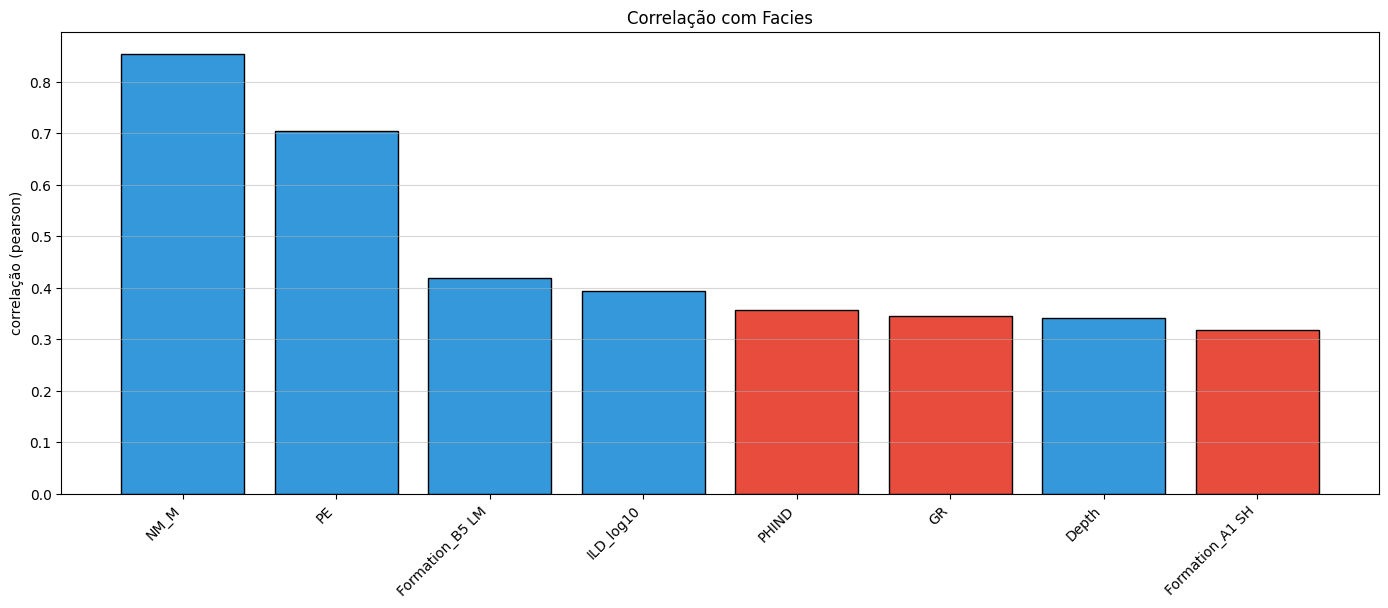

In [19]:
class Correlations:
    def __init__(self, df, tresh=0.5, method='pearson'):
        self.df = df.copy()
        self.tresh  = tresh
        self.method = method
        self.matrix = self.df.corr(method=self.method)

    def get(self, target_col):
        if target_col not in self.matrix.columns:
            return {}
            
        corr = self.matrix[target_col].drop(target_col)
        keep = corr[abs(corr) >= self.tresh].sort_values(key=abs, ascending=False)        
        return {ref: corr for ref, corr in keep.items()}
    
    def all(self):
        result = {}
        for col in self.matrix.columns:
            info = self.get(col)
            if len(info) > 0:
                result[col] = info
        return result
    
    def plot(self, target_col, show_max=None):
        corrs = self.get(target_col)
        
        if not corrs: 
            return
        
        original_values = self.matrix.loc[list(corrs.keys()), target_col]
        labels = [str(label)[:20] for label in corrs.keys()]
        values = [abs(v) for v in corrs.values()] # Altura da barra = Importância
        
        colors = ['#3498db' if original_values[label] > 0 else '#e74c3c' for label in corrs.keys()]
        plt.bar(labels[:show_max], values[:show_max], color=colors[:show_max], edgecolor='black')
        plt.title(f'Correlação com {target_col}')
        plt.ylabel(f'correlação ({self.method})'); plt.grid(axis='y', alpha=0.5)

        if len(corrs) >= 4:
            plt.xticks(rotation=45, ha='right')
    
    def heatmap(self, target_col, n=None):
        if target_col not in self.matrix.columns: 
            return

        top_cols = self.matrix[target_col].abs().sort_values(ascending=False).drop(target_col)
        
        if n: 
            top_cols = top_cols.head(n)
        
        cols_to_plot  = [target_col] + top_cols.index.tolist()
        matrix_subset = self.matrix.loc[cols_to_plot, cols_to_plot]

        plt.figure(figsize=(17, 10))
        sns.heatmap(matrix_subset.abs(), annot=True, fmt=".2f", cmap='Blues', vmin=0, vmax=1)
        plt.title(f'Mapa de Calor (Top {n})')
        plt.xticks(rotation=45, ha='right')
        plt.show()


corr = Correlations(df, tresh=0.30)
plt.figure(figsize=(17, 6))
corr.plot(TARGET, show_max=None)
corr.get(TARGET)

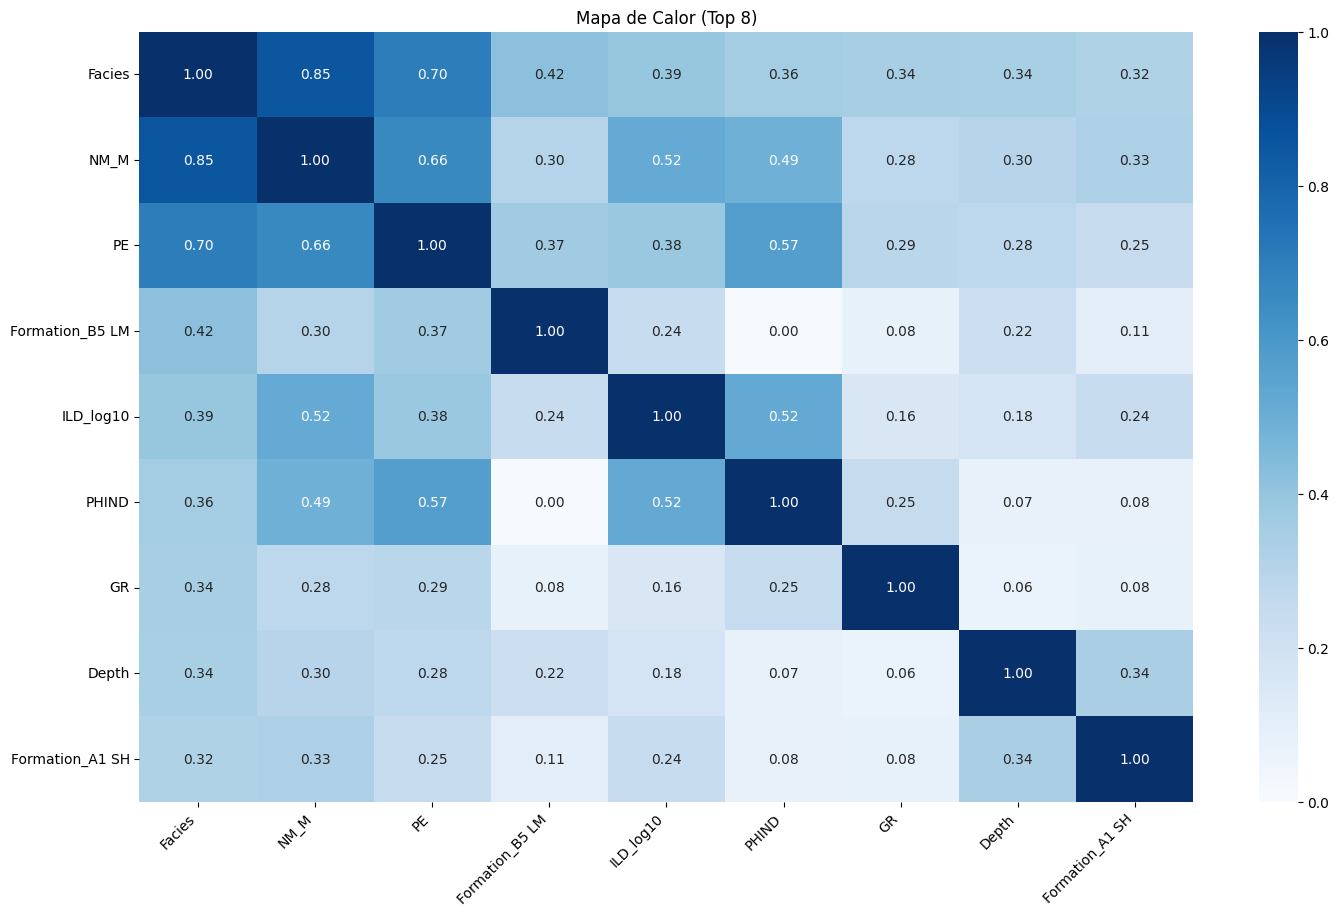

In [20]:
corr.heatmap(TARGET, n=8)

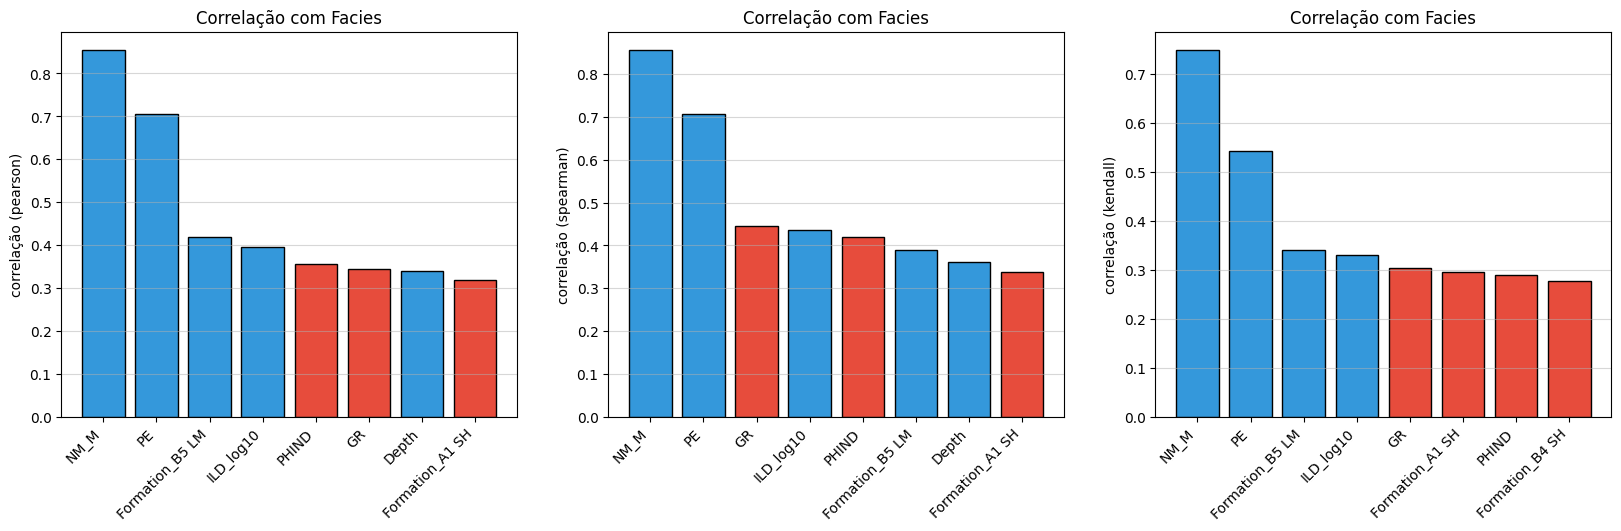

In [21]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
Correlations(df, tresh=0, method='pearson').plot(TARGET, show_max=8)

plt.subplot(1, 3, 2)
Correlations(df, tresh=0, method='spearman').plot(TARGET, show_max=8)

plt.subplot(1, 3, 3)
Correlations(df, tresh=0, method='kendall').plot(TARGET, show_max=8)

# SELEÇÃO

In [22]:
CORR_TRESH = 0.15
best_corr  = list(Correlations(df, tresh=CORR_TRESH).get(TARGET))
best_corr

['NM_M',
 'PE',
 'Formation_B5 LM',
 'ILD_log10',
 'PHIND',
 'GR',
 'Depth',
 'Formation_A1 SH',
 'Formation_B4 SH',
 'Formation_B1 SH',
 'Well Name_Recruit F9',
 'Formation_B2 LM',
 'Formation_C LM',
 'Formation_B3 SH',
 'DeltaPHI',
 'Formation_B1 LM',
 'Formation_C SH',
 'Well Name_CROSS H CATTLE',
 'Formation_B2 SH',
 'Formation_B3 LM']

In [23]:
df = df[best_corr + [TARGET]]
df

,NM_M,PE,Formation_B5 LM,ILD_log10,PHIND,GR,Depth,Formation_A1 SH,Formation_B4 SH,Formation_B1 SH,Well Name_Recruit F9,Formation_B2 LM,Formation_C LM,Formation_B3 SH,DeltaPHI,Formation_B1 LM,Formation_C SH,Well Name_CROSS H CATTLE,Formation_B2 SH,Formation_B3 LM,Facies
0,1,4.600,False,0.664,11.915,77.450,2793.0,True,False,False,False,False,False,False,9.900,False,False,False,False,False,3
1,1,4.100,False,0.661,12.565,78.260,2793.5,True,False,False,False,False,False,False,14.200,False,False,False,False,False,3
2,1,3.600,False,0.658,13.050,79.050,2794.0,True,False,False,False,False,False,False,14.800,False,False,False,False,False,3
3,1,3.500,False,0.655,13.115,86.100,2794.5,True,False,False,False,False,False,False,13.900,False,False,False,False,False,3
4,1,3.400,False,0.647,13.300,74.580,2795.0,True,False,False,False,False,False,False,13.500,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,2,3.617,False,0.947,7.254,46.719,3120.5,False,False,False,False,False,True,False,1.828,False,False,False,False,False,5
3228,2,3.344,False,0.953,8.013,44.563,3121.0,False,False,False,False,False,True,False,2.241,False,False,False,False,False,5
3229,2,3.190,False,0.964,8.013,49.719,3121.5,False,False,False,False,False,True,False,2.925,False,False,False,False,False,5
3230,2,3.152,False,0.965,7.708,51.469,3122.0,False,False,False,False,False,True,False,3.083,False,False,False,False,False,5


# SALVANDO O MODELO

In [24]:
df.to_csv('../Dataset/model.csv', index=None)